# N GL Vibração Livre -- Frequências  e modos normais

Cálculo das frequências naturais e modos normais para um sistema com N graus de liberdade não amortecido.

A equação de movimento é

$$ \boldsymbol{m} \ddot x + \boldsymbol{k} x = \boldsymbol{0},$$

Admitindo que a solução seja da forma $\boldsymbol{x}(t) = \boldsymbol{X} \cos \omega t$, podemos escrever

$$ -\omega^2 \boldsymbol{m} \boldsymbol{X} + \boldsymbol{k}\boldsymbol{X} = \boldsymbol{0},$$

ou 

$$ \left[\boldsymbol{k}-\omega^2 \boldsymbol{m}\right] \boldsymbol{X}= \boldsymbol{0},$$

pré-multiplicando por $ \boldsymbol{k}^{-1}$ e definindo $ \boldsymbol{D} = \boldsymbol{k}^{-1}\boldsymbol{m}$, temos 

$$ \left[\boldsymbol{I}-\omega^2 \boldsymbol{D}\right] \boldsymbol{X}= \boldsymbol{0},$$

dividindo por $\omega^2$ ainda $\lambda = 1/\omega^2$, ficamos com

$$ \left[\lambda \boldsymbol{I}- \boldsymbol{D}\right] \boldsymbol{X}= \boldsymbol{0},$$

que finalmente pode ser rearrumado para

$$ \lambda \boldsymbol{I} = \boldsymbol{D} \boldsymbol{X}.$$


É claro que $\boldsymbol{X}$ é um autovetor da matriz dinâmica $\boldsymbol{D}$ e $\lambda$ é o autovalor correspondente.

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Definição do sistema mecânico

O sistema vai ser definido em termos das matrizes de massa e rigidez. 

Vamos usa o exemplo 6.10 como demonstração, mas o  procedimento abaixo é genérico e vale para qualquer número de graus de liberdade, é necessário apenas informar corretamente as matrizes de massa e rigidez.


Para resolver o exemplo, temos que adotar valores numéricos para para a massa  e rigidez, e não de forma simbólica como no livro.  É perfeitamente possível resolver este problema simbolicamente como no livro usando o SymPy. No entanto, para problemas de maior porte, isto será inviável ou muito demorado.

In [3]:
m = 1.0
k = 1.0

M = m*np.array([[1.0, 0.0, 0.0],
                [0.0, 1.0, 0.0],
                [0.0, 0.0, 1.0]], dtype=np.double)
K = k*np.array([[ 2.0, -1.0,  0.0],
              [-1.0,  2.0, -1.0],
              [ 0.0, -1.0,  1.0]], dtype=np.double)

## Cálculo de autovalores e autovetores

*Atenção:* não há garantia de que os autovalores venham em alguma ordem em particular. Para tê-los ordenados é melhor fazer isto explicitamente.

In [4]:
D = np.linalg.inv(K)@M
λ, X = np.linalg.eig(D)
ω = 1.0/np.sqrt(λ)
perm = np.argsort(ω)     # reordering index
ω = ω[perm]
X[...] = X[:, perm]
display(ω)
display(X)

array([0.44504187, 1.2469796 , 1.80193774])

array([[-0.32798528, -0.73697623,  0.59100905],
       [-0.59100905, -0.32798528, -0.73697623],
       [-0.73697623,  0.59100905,  0.32798528]])

## Normalização dos modos normais

Para ficar igual ao exemplo do livro, temos que ter os modos normais com deslocamento unitário para o primeiro grau de liberdade

In [5]:
X /= X[0,:]
display(X)

array([[ 1.        ,  1.        ,  1.        ],
       [ 1.80193774,  0.44504187, -1.2469796 ],
       [ 2.2469796 , -0.80193774,  0.55495813]])

## Plotagem dos modos normais

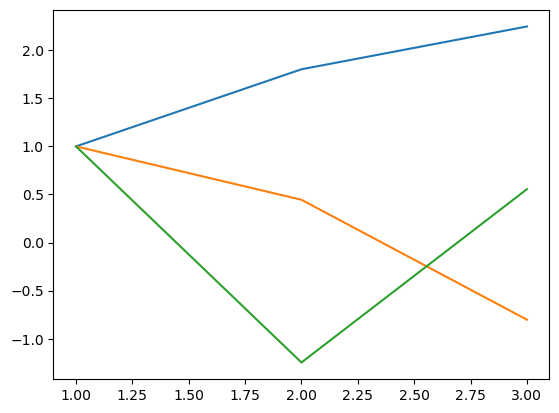

In [13]:
fig, ax = plt.subplots()
_ = ax.plot(np.arange(1, ω.size+1), X)